### 운동동작 데이터 탐색

** 3축 가속도계(accelerometer)와 3축 자이로스코프(gyroscope)를 활용해 측정된 센서 데이터

-train_features.csv (1875000, 8)
id 별 600 time 간 동작 데이터
id 3125개 x 600 time =1875000 데이터

-train_labels.csv (3125, 3)
id 별 동작과 동작 label(61개)

-test_features.csv (469200, 8)
id 별 600 time간 동작 데이터
id 782개 x 600 time =469200 데이터

-sample_submission.csv (782, 62)
id별 동작을 예측해 작성하는 csv

#### 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train=pd.read_csv('train_features.csv')
train_labels=pd.read_csv('train_labels.csv')
test=pd.read_csv('test_features.csv')
submission=pd.read_csv('sample_submission.csv')

#### 데이터 탐색

In [12]:
train.shape, train_labels.shape, test.shape, submission.shape

((1875000, 8), (3125, 3), (469200, 8), (782, 62))

In [13]:
train.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875000 entries, 0 to 1874999
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   id      int64  
 1   time    int64  
 2   acc_x   float64
 3   acc_y   float64
 4   acc_z   float64
 5   gy_x    float64
 6   gy_y    float64
 7   gy_z    float64
dtypes: float64(6), int64(2)
memory usage: 114.4 MB


In [19]:
train.describe()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
count,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06,1.875000e+06
mean,1.562000e+03,2.995000e+02,-4.489683e-01,-1.617913e-01,5.571471e-02,-1.307982e+00,-4.337745e-01,8.864100e-01
std,9.021100e+02,1.732049e+02,7.173082e-01,5.872018e-01,4.724824e-01,6.083228e+01,7.329832e+01,7.063345e+01
min,0.000000e+00,0.000000e+00,-8.838427e+00,-9.299714e+00,-8.316425e+00,-1.811127e+03,-1.594256e+03,-1.346143e+03
25%,7.810000e+02,1.497500e+02,-9.625643e-01,-5.163020e-01,-2.123550e-01,-2.048984e+01,-1.865320e+01,-1.546226e+01
50%,1.562000e+03,2.995000e+02,-6.560482e-01,-2.033985e-01,3.031258e-02,-1.421819e+00,-2.642753e-01,-1.798643e-01
75%,2.343000e+03,4.492500e+02,-1.701162e-04,1.406493e-01,3.581982e-01,1.572245e+01,1.676328e+01,1.641878e+01
max,3.124000e+03,5.990000e+02,8.426799e+00,8.484622e+00,6.432668e+00,1.870256e+03,2.111657e+03,1.255849e+03


In [4]:
#id 별로 각각 600개의 데이터가 있음을 확인   
train['id'].value_counts()

2047    600
1347    600
2378    600
1354    600
2379    600
       ... 
1699    600
675     600
2722    600
1698    600
0       600
Name: id, Length: 3125, dtype: int64

In [5]:
#train_labels.csv 에서 id 가 수행한 동작과 그에 따른 label값을 확인
train_labels

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


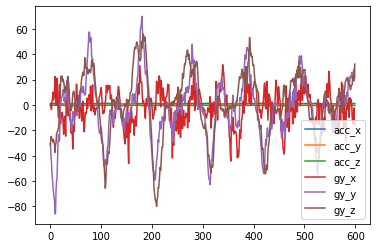

In [6]:
#id 별 동작들의 흐름 살펴보기
ex=train[train['id']==0]
ex.iloc[:,2:].plot()

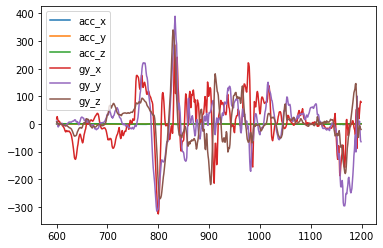

In [7]:
ex=train[train['id']==1]
ex.iloc[:,2:].plot()

#### 데이터 전처리

In [3]:
X_features = ['id', 'acc_x', 'acc_y', 'acc_z', 'gy_x', 'gy_y', 'gy_z']
y_train = train_labels['label']

# groupby로 묶어서 처리하지 않으면 어떤 방식으로? agg함수에 무엇이 들어가야 하나?
X_train = train[X_features].groupby('id').agg(['min','max','mean'])
X_test = test[X_features].groupby('id').agg(['min','max','mean'])

In [4]:
X_train.shape,X_test.shape

((3125, 18), (782, 18))

In [5]:
X_train.head()

acc_x                         acc_y                         acc_z  \
         min       max      mean       min       max      mean       min   
id                                                                         
0   0.591940  1.344268  0.931329 -0.624113  0.176871 -0.218471 -0.786336   
1  -2.156208  1.234020 -0.766580 -1.295598  0.700065 -0.317258 -1.019531   
2  -1.142847  1.219836  0.039836 -0.690990  0.650645 -0.082403  0.073846   
3  -1.417751 -0.622250 -0.887702 -0.540827  0.283721 -0.087668 -0.257124   
4  -2.429109  0.599720 -0.659018 -2.055076  1.724782 -0.337067 -1.250483   

                              gy_x                               gy_y  \
         max      mean         min         max       mean         min   
id                                                                      
0  -0.054876 -0.370422  -46.254836   31.644123  -1.865269  -85.887677   
1   0.888661 -0.004223 -325.328531  286.624363  11.071600 -315.096003   
2   1.332992  0.626012 -164.779067   73.525082  -8.472951 -249.953944   
3   0.598814  0.227357  -69.419166  192.765368  17.744167  -82.537304   
4   2.678034  0.202758 -769.076518  613.972600  -4.819638 -243.909948   

                                gy_z                        
           max      mean         min         max      mean  
id                                                          
0    69.847244 -3.359506  -79.930029   55.953827  1.182107  
1   389.608060  1.740475 -270.980823  340.170199  1.393294  
2   297.320834  0.597877  -44.192071   55.642836  3.053291  
3   159.083788  4.800931  -85.600536   56.456908 -5.869898  
4   284.952954  9.651713 -270.581913  221.015193  4.453382

In [7]:
X_test.head()

acc_x                         acc_y                         acc_z  \
           min       max      mean       min       max      mean       min   
id                                                                           
3125 -1.564000 -0.275446 -1.018731 -0.470937  0.228040 -0.019574 -0.573836   
3126 -1.929033  0.627571 -0.522843 -0.200678  1.708743  0.612161 -1.212052   
3127 -0.792916  2.972063  0.506947  0.219008  1.941820  0.903819 -0.484614   
3128 -1.045889  0.337281 -0.577603 -1.294482 -0.258476 -0.610557 -0.469924   
3129 -2.153047  0.015642 -0.738640 -0.860883  1.562602  0.182535 -0.631258   

                                gy_x                               gy_y  \
           max      mean         min         max       mean         min   
id                                                                        
3125  0.286182 -0.232259  -50.429364   56.953059  -3.185128  -81.607713   
3126  0.671876 -0.071092 -273.572486  132.830402 -17.741526  -97.100707   
3127  0.644154 -0.141098  -99.799971  160.426058  -2.179745  -98.420987   
3128  0.702574  0.031486 -229.072919  119.527887   0.808579 -168.031080   
3129  1.037876  0.401302 -345.447240  366.167357  -1.431538 -223.475411   

                                  gy_z                        
             max      mean         min         max      mean  
id                                                            
3125   96.185341  2.731872  -35.446915   49.981455 -2.000683  
3126  241.240196  6.974772 -147.597574  169.417650 -3.604579  
3127   74.530763 -2.251452 -154.477074   97.211730 -0.393175  
3128  118.268797 -2.984969 -117.297766  167.860762 -0.024318  
3129  226.728939  1.442366 -125.598600  138.130133  5.745498

### 모델링

#### 1. 결정트리

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf_model = RandomForestClassifier(n_jobs=-1, random_state=0, min_samples_leaf=30)

In [18]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [19]:
rf_pred = rf_model.predict_proba(X_test)
rf_pred

array([[0.        , 0.00061096, 0.00387341, ..., 0.10171585, 0.        ,
        0.03685437],
       [0.00385096, 0.        , 0.0010127 , ..., 0.00060397, 0.00096908,
        0.00250248],
       [0.00596429, 0.09302989, 0.00438667, ..., 0.00025974, 0.03234385,
        0.00578105],
       ...,
       [0.0050659 , 0.        , 0.00102072, ..., 0.        , 0.        ,
        0.00783263],
       [0.0021139 , 0.00711222, 0.00498425, ..., 0.00078047, 0.        ,
        0.00154705],
       [0.00371965, 0.        , 0.00068445, ..., 0.00021505, 0.        ,
        0.00371046]])

In [22]:
rf_pred.shape

(782, 61)

In [23]:
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,3903,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,3904,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,3905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
submission.iloc[:,1:] = rf_pred
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0.000000,0.000611,0.003873,0.001373,0.002073,0.000141,0.001600,0.000817,0.001854,...,0.017834,0.006821,0.016792,0.000883,0.001186,0.000357,0.006148,0.101716,0.000000,0.036854
1,3126,0.003851,0.000000,0.001013,0.006049,0.011564,0.002022,0.000000,0.002178,0.000640,...,0.005784,0.000000,0.006572,0.000192,0.005171,0.000796,0.007021,0.000604,0.000969,0.002502
2,3127,0.005964,0.093030,0.004387,0.006280,0.001159,0.016086,0.046629,0.020662,0.015522,...,0.000545,0.000000,0.000519,0.042595,0.014938,0.127107,0.000683,0.000260,0.032344,0.005781
3,3128,0.007467,0.006851,0.021328,0.008765,0.000000,0.009260,0.000391,0.010586,0.002676,...,0.000000,0.000000,0.000701,0.002224,0.022010,0.004944,0.013649,0.000189,0.000000,0.030535
4,3129,0.007581,0.000000,0.000839,0.001378,0.001571,0.003041,0.000000,0.000560,0.002998,...,0.000102,0.000000,0.000000,0.000000,0.000469,0.000200,0.002397,0.000175,0.000000,0.001230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0.003425,0.000175,0.000000,0.002825,0.079233,0.041517,0.000799,0.004673,0.001212,...,0.004204,0.000200,0.001766,0.000154,0.000250,0.014775,0.001101,0.000000,0.004100,0.000955
778,3903,0.004924,0.001812,0.000000,0.001123,0.006719,0.005686,0.000478,0.000477,0.002210,...,0.000125,0.000000,0.000000,0.000262,0.001079,0.004396,0.003241,0.000000,0.005330,0.000752
779,3904,0.005066,0.000000,0.001021,0.006054,0.001119,0.000772,0.000000,0.000000,0.001810,...,0.000341,0.000000,0.000385,0.000000,0.003983,0.000154,0.006035,0.000000,0.000000,0.007833
780,3905,0.002114,0.007112,0.004984,0.001776,0.000000,0.001515,0.169801,0.006530,0.010818,...,0.000482,0.000000,0.000519,0.029374,0.006355,0.008687,0.000000,0.000780,0.000000,0.001547


In [53]:
submission.to_csv('baseline_rf.csv', index=False)

In [ ]:
# 데이터 전처리 고민
# 데이터 과적합 처리 고민